# Training Models

### 1. Classifying the polarity

A basic task in sentiment analysis is classifying the polarity of the text. Previous to this section, we have to annotate the polarity of each tweet in the dataset. 
This labor has been made with cleaned tweets and the new *polarity* column has been added depending on its polarity. There are three class labels we will predict:

- Positive: value 1
- Neutral : value 0
- Negative: value -1

We start by importing the libraries and configuring some settings:

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
pd.set_option('max_colwidth',150)
import seaborn as sns
import nltk
from nltk.corpus import stopwords
stop = nltk.corpus.stopwords.words("spanish")
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import TfidfVectorizer 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Firstly, we load classified data from the input csv file.

In [173]:
df_tweets = pd.read_csv('4_Tweets_8M_SA.csv', sep="|")
df_tweets.shape

(4864, 21)

Notice that there are 4.864 records and 21 columns. The new column is "Polarity" and contains uniques values `-1`, `0` and `1`.
In this notebook, we will work with the *tweets* variable and the *Polarity* variable. Let's see some examples of each polarity:

In [174]:
df_tweets[["tweets","polarity"]].head(20)

,tweets,polarity
0,de mis favoritas 💜,1
1,la marcha en guadalajara jalisco 💪🏼,0
2,mejor video en lo que va del dia llore 💪🏽💪🏽💪🏽💜,1
3,💜 impresionante 💜 la colapsa el centro de santander cantabria 💪🏻,1
4,companeras no estamos solas estamos juntas 💜✊🏼,1
5,mas fotos del en salta,0
6,mi mama reportandose desde la marcha feminista 😂,0
7,por los derechos conquistados y los que faltan,1
8,hoy orgullo al maximo por ser de villablino asi si 💪🏻💜,1
9,y la ultima foto la mirada de la esperanza retratos en 💜,1


Let's see the number of tweets depending on the polarity:

In [146]:
df_tweets[["tweets", "polarity"]].groupby("polarity").count()

,tweets
polarity,
-1,915
0,1874
1,2075


## 2. Training Models

### 2.1. Vectorization
In this point, we need to convert words to numbers. This can be done with *TfidfVectorizer* to vectorize *Tweets* column. In general, It converts a collection of text to a matrix of TF-IDF features. The tf-idf is a term-weighting that reflects the importance of words in the corpus. The tf-idf value increases proportionally to the number of times a word appears in the set of tweets and is offset by the number of tweets in the corpus that contain the word. The parameters that we are going to use:
- min_df : float in range [0.0, 1.0] or int, default=1
        
- ngram_range : tuple (min_n, max_n)
       
- stop_words : string {'english'}, list, or None (default)
        
- use_idf : boolean, default=True
        
- sublinear_tf : boolean, default=False
       

In this work we will also compare the influence of *stopwords* in the models, for this reason, firstly we will not remove them from the corpus and after we will remove them to check obtained results. 

In [147]:
# instantiate the vectorizer
tfidfconverter = TfidfVectorizer(min_df=3, ngram_range=(1, 2), use_idf= True, sublinear_tf=True)

# fit and transform on it the training and test sets
X = tfidfconverter.fit_transform(df_tweets.tweets).toarray()
y = df_tweets["polarity"]

This is a mapping of terms and number of occurrences in our corpus:

In [148]:
tfidfconverter.vocabulary_

{'de': 533,
 'mis': 2112,
 'favoritas': 1184,
 'de mis': 609,
 'la': 1595,
 'marcha': 1959,
 'en': 903,
 'guadalajara': 1339,
 'la marcha': 1651,
 'marcha en': 1962,
 'en guadalajara': 928,
 'mejor': 2051,
 'video': 3506,
 'lo': 1819,
 'que': 2711,
 'va': 3442,
 'del': 682,
 'dia': 727,
 'llore': 1815,
 'mejor video': 2055,
 'video en': 3508,
 'en lo': 934,
 'lo que': 1827,
 'que va': 2807,
 'va del': 3444,
 'del dia': 687,
 'dia llore': 740,
 'impresionante': 1542,
 'colapsa': 378,
 'el': 811,
 'centro': 334,
 'santander': 2957,
 'impresionante la': 1543,
 'el centro': 819,
 'centro de': 335,
 'de santander': 631,
 'companeras': 405,
 'no': 2267,
 'estamos': 1096,
 'solas': 3134,
 'juntas': 1583,
 'no estamos': 2274,
 'estamos solas': 1104,
 'estamos juntas': 1100,
 'mas': 1990,
 'fotos': 1243,
 'salta': 2945,
 'mas fotos': 1996,
 'fotos del': 1245,
 'del en': 689,
 'mi': 2070,
 'mama': 1923,
 'desde': 714,
 'feminista': 1215,
 'mi mama': 2080,
 'desde la': 716,
 'marcha feminista': 1

The total number of terms contained in the corpus:

In [149]:
X.shape

(4864, 3600)

Now, let's use *TfidVectorizer* removing *Spanish stopwords*.

In [150]:
tfidfconverter2 = TfidfVectorizer(stop_words = stop, min_df = 3, ngram_range = (1, 2), use_idf = True, sublinear_tf=True)
X2 = tfidfconverter2.fit_transform(df_tweets.tweets).toarray()

The number of terms contained in the corpus has decreased due to stopwords.

In [151]:
X2.shape

(4864, 2045)

We will also use parameter n_gram = (1,3) in order to compare result in the clasification models.

In [152]:
tfidfconverter3 = TfidfVectorizer(min_df = 3, ngram_range = (1, 3), use_idf = True, sublinear_tf=True)
X3 = tfidfconverter3.fit_transform(df_tweets.tweets).toarray()

In [153]:
X3.shape

(4864, 4534)

Now, we will use parameter n_gram=(1,3) and removing stopwords from the corpus.

In [154]:
tfidfconverter4 = TfidfVectorizer(stop_words = stop, min_df = 3, ngram_range = (1, 3), use_idf = True, sublinear_tf=True)
X4 = tfidfconverter4.fit_transform(df_tweets.tweets).toarray()

In [155]:
X4.shape

(4864, 2207)

### 2.2 Splitting into train and test sets
Now, we are going to divide the corpus in train and test sets.

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Also, we are going to consider *stopwords* to divide into train and test sets.

In [157]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2, random_state = 0) 

In addition, we will train the model using n_gram parameter like (1,3).

In [158]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size = 0.2, random_state = 0) 

Same work but considering n_gram = (1,3) and removing stopwords from the corpus.

In [159]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size = 0.2, random_state = 0) 

### 2.3 Cross-validation algorithm

We are going to use 4 different models to train the data corpus:

- MultinomialNB
- Support Vector Machine (SVM)
- Logistic Regresion
- Random Forest Classifier

We will use *cross-validation* in order to select the best classification model. It consists on split the data into a train and test set many times. The evaluation metric is then averaged over the different folds.

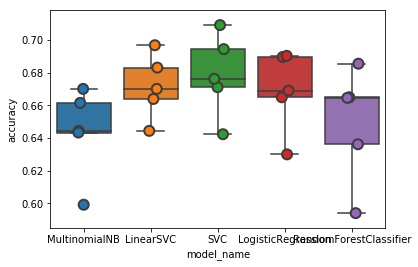

model_name
LinearSVC                 0.671672
LogisticRegression        0.668796
MultinomialNB             0.643713
RandomForestClassifier    0.649057
SVC                       0.678663
Name: accuracy, dtype: float64

In [160]:
models = [
    MultinomialNB(alpha = 0.05),
    LinearSVC(),
    svm.SVC(kernel = 'linear', gamma = 'auto', random_state = 0),
    LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'multinomial'),
    RandomForestClassifier(n_estimators = 1000, random_state = 0)

]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# to plot the model results
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()

As we see, *SVC* model is the best model and the second one is *Logistic Regression*. Now, let's see which are the best parameters to train each model.

### 2.4 GridSearchCV

In order to select best parameter it is used GridSearchCV in each classification model. In this cases, the default scoring metric is the *accuracy*.

In [15]:
parameters_svc = {
    'kernel' : ('linear', 'rbf'),
    'C' : [1, 10]
}

svc = svm.SVC(gamma = "scale")
grid_search = GridSearchCV(svc, parameters_svc, cv = 2, n_jobs = 3, verbose = 10)
grid_search.fit(X, y)
grid_search.best_params_

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done   4 out of   8 | elapsed:  3.7min remaining:  3.7min
[Parallel(n_jobs=3)]: Done   5 out of   8 | elapsed:  3.9min remaining:  2.4min
[Parallel(n_jobs=3)]: Done   6 out of   8 | elapsed:  4.0min remaining:  1.3min
[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed:  5.6min remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed:  5.6min finished


{'C': 1, 'kernel': 'linear'}

In [16]:
parameters_logreg = {
    'C': (0.25, 0.5, 1.0),
    'penalty': ('l1', 'l2')
}

logreg = LogisticRegression(random_state = 0)
grid_search = GridSearchCV(logreg, parameters_logreg, cv = 2, n_jobs = 3, verbose = 10)
grid_search.fit(X, y)
grid_search.best_params_

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done   9 out of  12 | elapsed:    1.9s remaining:    0.6s
[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:    2.4s finished
C:\Users\paloma.perez.de.leon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\paloma.perez.de.leon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


{'C': 1.0, 'penalty': 'l2'}

### 2.5 Training a classification model
Now that we have selected the best 2 models and its optimal parameters, it is time to see the result of the real training action using the *SVM* and *LogisticRegression* models.

### 2.5.1 Training with *Support Vector Machine* SVM algorithm

Support vector classifier class *svc* and *fit* method from the *sklearn.svm* library are used to train the machine learning model. We need to pass training data and training target sets to this method. To predict the polarity of tweets in the test set it is used *predict* method. 
Firstly, we will train SVM with stopwords in the corpus:

In [161]:
SVM = svm.SVC(C = 1, kernel = 'linear', gamma = 'auto', random_state = 0)
SVM.fit(X_train,y_train)
predictions_SVM = SVM.predict(X_test)

To evaluate the perfomance of a classification model we can use some metrics as the *accuracy*, *precision*, *recall* and *F1 score*.

In [162]:
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, y_test))
print ("-"*70)
conf_matrix = np.array(confusion_matrix(y_test,predictions_SVM))
confusion = pd.DataFrame(conf_matrix, index=['negative', 'neutral', 'positive'],
                         columns=['predicted_negative','predicted_neutral', 'predicted_positive'])
print(confusion)
print ("-"*70)
print(classification_report(y_test,predictions_SVM))  

SVM Accuracy Score ->  0.6998972250770812
----------------------------------------------------------------------
          predicted_negative  predicted_neutral  predicted_positive
negative                  94                 53                  45
neutral                   12                300                  64
positive                  21                 97                 287
----------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.74      0.49      0.59       192
           0       0.67      0.80      0.73       376
           1       0.72      0.71      0.72       405

   micro avg       0.70      0.70      0.70       973
   macro avg       0.71      0.67      0.68       973
weighted avg       0.71      0.70      0.70       973



Now, we will train SVM removing stopwords in the corpus. 

In [163]:
SVM = svm.SVC(C = 1, kernel = 'linear', gamma = 'auto', random_state = 0)
SVM.fit(X2_train,y2_train)
predictions_stopwords_SVM = SVM.predict(X2_test)

Evaluating the performance:

In [164]:
print("SVM Accuracy Score (without stopwords) -> ", accuracy_score(predictions_stopwords_SVM, y2_test))
print ("-"*70)
conf_matrix = np.array(confusion_matrix(y2_test,predictions_stopwords_SVM))
confusion = pd.DataFrame(conf_matrix, index=['negative', 'neutral', 'positive'],
                         columns=['predicted_negative','predicted_neutral', 'predicted_positive'])
print(confusion)
print ("-"*70)
print(classification_report(y2_test,predictions_stopwords_SVM)) 

SVM Accuracy Score (without stopwords) ->  0.6639260020554985
----------------------------------------------------------------------
          predicted_negative  predicted_neutral  predicted_positive
negative                  60                 76                  56
neutral                   13                294                  69
positive                  20                 93                 292
----------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.65      0.31      0.42       192
           0       0.63      0.78      0.70       376
           1       0.70      0.72      0.71       405

   micro avg       0.66      0.66      0.66       973
   macro avg       0.66      0.61      0.61       973
weighted avg       0.66      0.66      0.65       973



From the output it can be seen that SVC model achieved best accuracy considering the stopwords in the corpus. Let's try now with n_gram parameter equal to (1,3):

In [165]:
SVM = svm.SVC(C = 1, kernel = 'linear', gamma = 'auto', random_state = 0)
SVM.fit(X3_train,y3_train)
predictions_ngram_SVM = SVM.predict(X3_test)
print("SVM Accuracy Score (with n_gram = (1,3)) -> ", accuracy_score(predictions_ngram_SVM, y3_test))
print ("-"*70)
conf_matrix = np.array(confusion_matrix(y3_test,predictions_ngram_SVM))
confusion = pd.DataFrame(conf_matrix, index=['negative', 'neutral', 'positive'],
                         columns=['predicted_negative','predicted_neutral', 'predicted_positive'])
print(confusion)
print ("-"*70)
print(classification_report(y3_test,predictions_ngram_SVM))

SVM Accuracy Score (with n_gram = (1,3)) ->  0.6906474820143885
----------------------------------------------------------------------
          predicted_negative  predicted_neutral  predicted_positive
negative                  90                 54                  48
neutral                   13                291                  72
positive                  20                 94                 291
----------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.73      0.47      0.57       192
           0       0.66      0.77      0.71       376
           1       0.71      0.72      0.71       405

   micro avg       0.69      0.69      0.69       973
   macro avg       0.70      0.65      0.67       973
weighted avg       0.70      0.69      0.69       973



With n_gram parameter equal to (1,3) and removing stopwords from corpus:

In [166]:
SVM = svm.SVC(C = 1, kernel = 'linear', gamma = 'auto', random_state = 0)
SVM.fit(X4_train,y4_train)
predictions_stopwords_ngram_SVM = SVM.predict(X4_test)
print("SVM Accuracy Score (with n_gram = (1,3) and without stopwords) -> ", accuracy_score(predictions_stopwords_ngram_SVM, y4_test))
print ("-"*70)
conf_matrix = np.array(confusion_matrix(y4_test,predictions_stopwords_ngram_SVM))
confusion = pd.DataFrame(conf_matrix, index=['negative', 'neutral', 'positive'],
                         columns=['predicted_negative','predicted_neutral', 'predicted_positive'])
print(confusion)
print ("-"*70)
print(classification_report(y4_test,predictions_stopwords_ngram_SVM))

SVM Accuracy Score (with n_gram = (1,3) and without stopwords) ->  0.6670092497430626
----------------------------------------------------------------------
          predicted_negative  predicted_neutral  predicted_positive
negative                  62                 75                  55
neutral                   14                295                  67
positive                  20                 93                 292
----------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.65      0.32      0.43       192
           0       0.64      0.78      0.70       376
           1       0.71      0.72      0.71       405

   micro avg       0.67      0.67      0.67       973
   macro avg       0.66      0.61      0.62       973
weighted avg       0.67      0.67      0.65       973



### 2.5.2 Training with *Logistic Regression algorithm*

In [167]:
logreg = LogisticRegression(C = 1, random_state = 0, solver = 'lbfgs', multi_class = 'multinomial', penalty = 'l2')
logreg.fit(X_train,y_train)
predictions_logreg = logreg.predict(X_test)

Let's see the perfomance of this model

In [168]:
print("Logistic Regresion Accuracy Score -> ", accuracy_score(predictions_logreg, y_test))
print ("-"*70)
conf_matrix = np.array(confusion_matrix(y_test,predictions_logreg))
confusion = pd.DataFrame(conf_matrix, index=['negative', 'neutral', 'positive'],
                         columns=['predicted_negative','predicted_neutral', 'predicted_positive'])
print(confusion) 
print ("-"*70)
print(classification_report(y_test,predictions_logreg)) 

Logistic Regresion Accuracy Score ->  0.6813977389516958
----------------------------------------------------------------------
          predicted_negative  predicted_neutral  predicted_positive
negative                  78                 60                  54
neutral                   12                287                  77
positive                  14                 93                 298
----------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.75      0.41      0.53       192
           0       0.65      0.76      0.70       376
           1       0.69      0.74      0.71       405

   micro avg       0.68      0.68      0.68       973
   macro avg       0.70      0.64      0.65       973
weighted avg       0.69      0.68      0.67       973



We will train *LogisticRegression* removing stopwords from the corpus.

In [169]:
logreg = LogisticRegression(C = 1, random_state = 0, solver = 'lbfgs', multi_class = 'multinomial', penalty = 'l2')
logreg.fit(X2_train,y2_train)
predictions_stopwords_logreg = logreg.predict(X2_test)

Performance:

In [170]:
print("Logistic Regresion Accuracy Score (without stopwords) -> ", accuracy_score(predictions_stopwords_logreg, y2_test))
print ("-"*70)
conf_matrix = np.array(confusion_matrix(y2_test,predictions_logreg))  
confusion = pd.DataFrame(conf_matrix, index=['negative', 'neutral', 'positive'],
                         columns=['predicted_negative','predicted_neutral', 'predicted_positive'])
print(confusion)
print ("-"*70)
print(classification_report(y2_test,predictions_stopwords_logreg)) 

Logistic Regresion Accuracy Score (without stopwords) ->  0.6495375128468653
----------------------------------------------------------------------
          predicted_negative  predicted_neutral  predicted_positive
negative                  78                 60                  54
neutral                   12                287                  77
positive                  14                 93                 298
----------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.66      0.26      0.37       192
           0       0.63      0.77      0.69       376
           1       0.67      0.72      0.70       405

   micro avg       0.65      0.65      0.65       973
   macro avg       0.65      0.58      0.59       973
weighted avg       0.65      0.65      0.63       973



Using n_gram = (1,3) and considering stopwords from the corpus:

In [171]:
logreg = LogisticRegression(C = 1, random_state = 0, solver = 'lbfgs', multi_class = 'multinomial', penalty = 'l2')
logreg.fit(X3_train,y3_train)
predictions_ngram_logreg = logreg.predict(X3_test)
print("Logistic Regresion Accuracy Score (withput n_gram = (1,3)) -> ", accuracy_score(predictions_ngram_logreg, y3_test))
print ("-"*70)
conf_matrix = np.array(confusion_matrix(y3_test,predictions_ngram_logreg))  
confusion = pd.DataFrame(conf_matrix, index=['negative', 'neutral', 'positive'],
                         columns=['predicted_negative','predicted_neutral', 'predicted_positive'])
print(confusion)
print ("-"*70)
print(classification_report(y3_test,predictions_ngram_logreg)) 

Logistic Regresion Accuracy Score (withput n_gram = (1,3)) ->  0.6793422404933196
----------------------------------------------------------------------
          predicted_negative  predicted_neutral  predicted_positive
negative                  75                 59                  58
neutral                   11                287                  78
positive                  14                 92                 299
----------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.75      0.39      0.51       192
           0       0.66      0.76      0.71       376
           1       0.69      0.74      0.71       405

   micro avg       0.68      0.68      0.68       973
   macro avg       0.70      0.63      0.64       973
weighted avg       0.69      0.68      0.67       973



Using n_gram = (1,3) and removing stopwords from the corpus:

In [172]:
logreg = LogisticRegression(C = 1, random_state = 0, solver = 'lbfgs', multi_class = 'multinomial', penalty = 'l2')
logreg.fit(X4_train,y4_train)
predictions_ngram_stopwords_logreg = logreg.predict(X4_test)
print("Logistic Regresion Accuracy Score (withput n_gram = (1,3) and without stopwords) -> ", accuracy_score(predictions_ngram_stopwords_logreg, y4_test))
print ("-"*70)
conf_matrix = np.array(confusion_matrix(y4_test,predictions_ngram_stopwords_logreg))  
confusion = pd.DataFrame(conf_matrix, index=['negative', 'neutral', 'positive'],
                         columns=['predicted_negative','predicted_neutral', 'predicted_positive'])
print(confusion)
print ("-"*70)
print(classification_report(y4_test,predictions_ngram_stopwords_logreg)) 

Logistic Regresion Accuracy Score (withput n_gram = (1,3) and without stopwords) ->  0.6557040082219938
----------------------------------------------------------------------
          predicted_negative  predicted_neutral  predicted_positive
negative                  48                 78                  66
neutral                   10                292                  74
positive                  15                 92                 298
----------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.66      0.25      0.36       192
           0       0.63      0.78      0.70       376
           1       0.68      0.74      0.71       405

   micro avg       0.66      0.66      0.66       973
   macro avg       0.66      0.59      0.59       973
weighted avg       0.66      0.66      0.64       973



### 3. CONCLUSIONS:

- TfidVectorize is better considering n_gram = (1,2) instead of n_gram = (1,3).
- Best model is SVM with an accuracy of 69.98%.
- Best parameters for SVM model are {C = 1.0, kernel = 'linear'}.
- Nice result with Logistic Regression model, with an accuracy of 68.13%.
- Best parameters for Logistic Regression model are { C = 1.0, penalty = 'l2'}.
- Stopwords affect to the result, it means spanish stopwords have an important presence in our tweets.
- Other models like MultinomialNB or RandomForest give poor accuracies.